### Feature Selection for Classification Problem using Mutual Information

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate Dataset
X, y = make_classification(n_samples=50, n_features=5, n_informative=2)
X = pd.DataFrame(X)

In [2]:
X.head()

,0,1,2,3,4
0,-0.563042,-0.493615,0.482412,0.681318,-0.066740
1,-2.694940,-0.825097,-1.004567,-0.249176,-1.204487
2,-1.042250,-0.237252,0.139136,0.256394,-0.088042
3,-0.400803,0.149334,0.132215,0.007081,0.188065
4,1.191284,0.868737,0.926930,0.162125,1.189271


In [3]:
y[:5]

array([0, 0, 0, 1, 1])

In [4]:
# Select top K features
from sklearn.feature_selection import SelectKBest

# To get mutual score in classification dataset
from sklearn.feature_selection import mutual_info_classif

In [5]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)

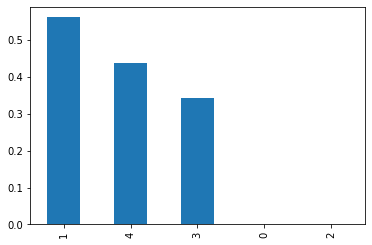

In [6]:
fs.fit(X,y)
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))
plt.show()

In [7]:
selected_X = fs.fit_transform(X,y)
selected_X = pd.DataFrame(selected_X)

In [8]:
X.head()

,0,1,2,3,4
0,-0.563042,-0.493615,0.482412,0.681318,-0.066740
1,-2.694940,-0.825097,-1.004567,-0.249176,-1.204487
2,-1.042250,-0.237252,0.139136,0.256394,-0.088042
3,-0.400803,0.149334,0.132215,0.007081,0.188065
4,1.191284,0.868737,0.926930,0.162125,1.189271


In [9]:
selected_X.head()

,0,1,2
0,-0.493615,0.681318,-0.066740
1,-0.825097,-0.249176,-1.204487
2,-0.237252,0.256394,-0.088042
3,0.149334,0.007081,0.188065
4,0.868737,0.162125,1.189271


### Feature Selection for Regression Problem using Mutual Information

In [10]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
import pandas as pd
import matplotlib.pyplot as plt

# generate dataset
X, y = make_regression(n_samples=50, n_features=5)
X = pd.DataFrame(X)

In [11]:
X.head(5)

,0,1,2,3,4
0,0.055310,0.151878,1.874731,-1.492309,-0.339965
1,0.339411,0.382434,1.254816,-0.765235,-0.861789
2,0.772842,-0.749112,-0.676954,0.709598,1.968977
3,1.873585,-0.881858,0.283753,-1.007758,-0.907203
4,-1.149786,-0.298016,-2.017906,1.421077,0.765264


In [12]:
y[:5]

array([  5.85458958,  12.48022995, 168.94035973,   8.20979278,
       -85.57165966])

In [13]:
fs = SelectKBest(score_func=mutual_info_regression, k=3)

<AxesSubplot:>

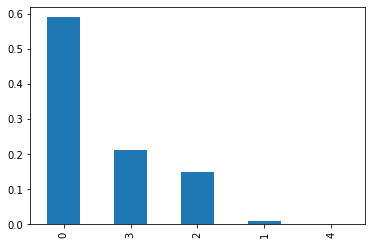

In [14]:
fs.fit(X,y)
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))

In [15]:
X_selected = fs.fit_transform(X, y)
X_selected = pd.DataFrame(X_selected)

In [16]:
X.head()

,0,1,2,3,4
0,0.055310,0.151878,1.874731,-1.492309,-0.339965
1,0.339411,0.382434,1.254816,-0.765235,-0.861789
2,0.772842,-0.749112,-0.676954,0.709598,1.968977
3,1.873585,-0.881858,0.283753,-1.007758,-0.907203
4,-1.149786,-0.298016,-2.017906,1.421077,0.765264


In [17]:
X_selected.head()

,0,1,2
0,0.055310,1.874731,-1.492309
1,0.339411,1.254816,-0.765235
2,0.772842,-0.676954,0.709598
3,1.873585,0.283753,-1.007758
4,-1.149786,-2.017906,1.421077
